In [1]:
import tensorflow as tf
import os


In [ ]:
# import cv2
# import imghdr

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:

data = tf.keras.utils.image_dataset_from_directory('data3')


Found 3000 files belonging to 6 classes.


In [4]:
data = data.map(lambda x,y: (x/255, y))
 

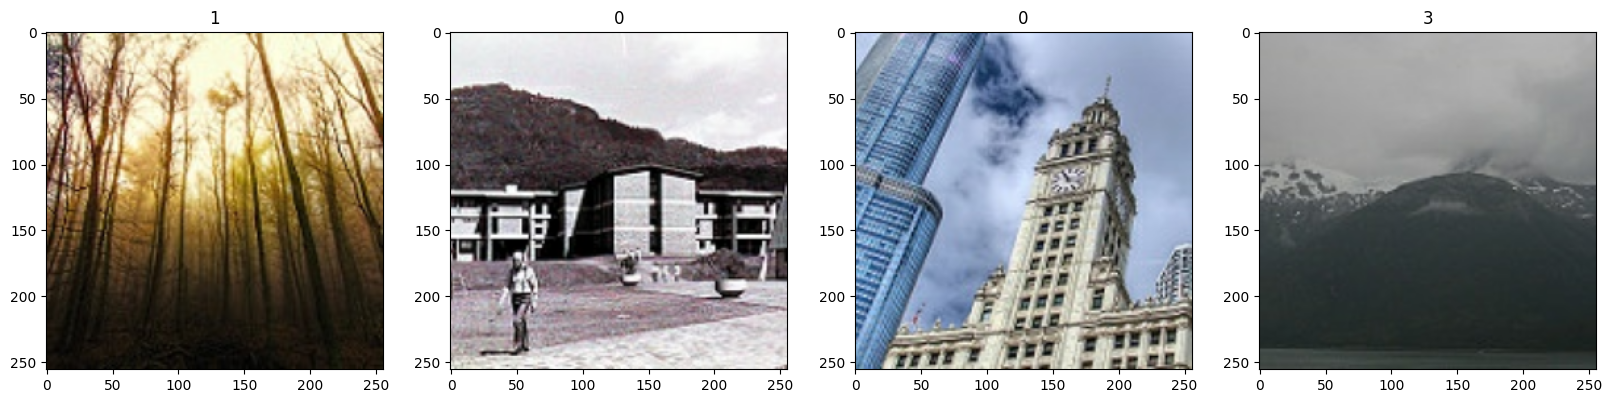

In [5]:


scaled_iterator = data.as_numpy_iterator() 


batch = scaled_iterator.next() #images represented as numpy arrays

# print(batch[0].shape)

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [6]:
len(data)*0.7 #batches

65.8

In [7]:
train_size = int(len(data)*.3) #to train
val_size = int(len(data)*.6) #to evaluate while training
test_size = int(len(data)*.1) #to test

In [8]:
val_size

18

In [9]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [10]:
len(test)

9

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


In [12]:
model = Sequential()


In [14]:
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(256,256,3), kernel_regularizer=tf.keras.regularizers.L2(l=0.01)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32, (3,3), activation='relu', kernel_regularizer=tf.keras.regularizers.L2(l=0.01)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(16, (3,3), activation='relu', kernel_regularizer=tf.keras.regularizers.L2(l=0.01)))
model.add(MaxPooling2D(2,2))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='softmax'))




In [15]:
model.compile('adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])


In [16]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [17]:
logdir='logs' #


In [18]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir) #to save model


In [ ]:
train[1]

In [19]:
# hist = model.fit(train, epochs=3, validation_data=val,callbacks=[tensorboard_callback])
hist = model.fit(train, epochs=10, validation_data=val)


Epoch 1/10
65/65 [==============================] - 63s 936ms/step - loss: 1.8476 - accuracy: 0.4053 - val_loss: 1.4462 - val_accuracy: 0.5208
Epoch 2/10
65/65 [==============================] - 70s 1s/step - loss: 1.3228 - accuracy: 0.5750 - val_loss: 1.2498 - val_accuracy: 0.5955
Epoch 3/10
65/65 [==============================] - 73s 1s/step - loss: 1.1591 - accuracy: 0.6385 - val_loss: 1.1767 - val_accuracy: 0.6059
Epoch 4/10
65/65 [==============================] - 71s 1s/step - loss: 1.0359 - accuracy: 0.6865 - val_loss: 1.1302 - val_accuracy: 0.6163
Epoch 5/10
65/65 [==============================] - 68s 1s/step - loss: 0.9155 - accuracy: 0.7346 - val_loss: 1.1979 - val_accuracy: 0.5990
Epoch 6/10
65/65 [==============================] - 74s 1s/step - loss: 0.7575 - accuracy: 0.7885 - val_loss: 1.0937 - val_accuracy: 0.6858
Epoch 7/10
65/65 [==============================] - 75s 1s/step - loss: 0.6611 - accuracy: 0.8231 - val_loss: 1.0668 - val_accuracy: 0.6997
Epoch 8/10
65/65 

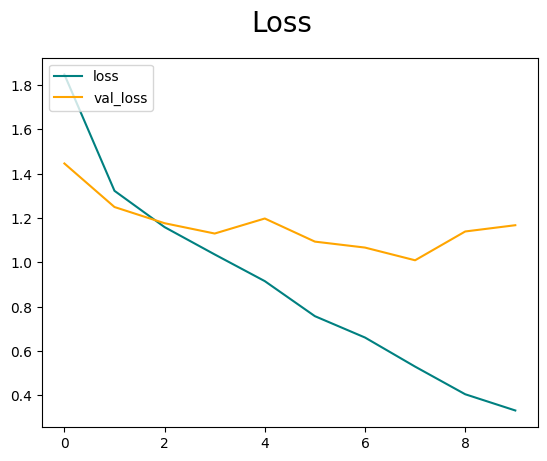

In [20]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

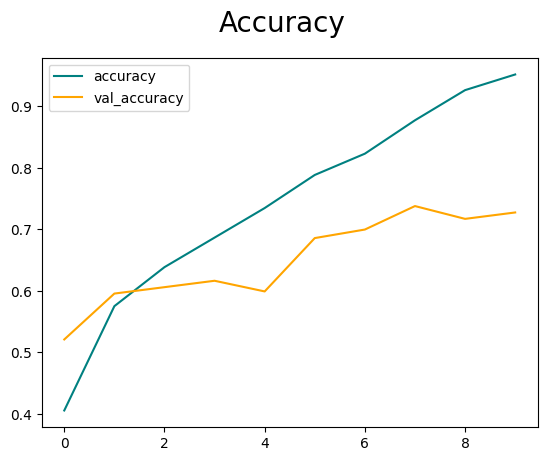

In [21]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [ ]:
print(f'Precision:{pre.result().numpy()}, Recall: {re.result().numpy()},Accuracy: {acc.result().numpy()}')


In [ ]:
import cv2
img = cv2.imread('265.png')
plt.imshow(img)
plt.show()


In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))


In [ ]:
yhat


In [ ]:
if yhat < 0.5: 
    print(f'Predicted class is Circle')
else:
    print(f'Predicted class is Square')